In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob 
from sklearn.model_selection import train_test_split
import os 
import pickle 

%matplotlib inline

# Generating training and testing datasets

We could use the function "sklearn.model_selection.train_test_split" but our dataset contains many correlated sequences of images which would end up both in the training and testing sets when performing a random shuffle. I will therefore manually split the data using the file names in each folder. 

In [2]:
vehicle_dirs = [x[0] for x in os.walk('./dataset/vehicles/')]  # List pf directories containing car images

In [7]:
test_percent = 0.2     # Percentage of data to be used for testing

cars = {'train': [], 'test': []}
notcars = {'train': [], 'test': []}
for folder in vehicle_dirs:
    car_images = glob.glob(folder + '/*.png')
    car_images.sort()
    if len(car_images)>0:
        cars['test'].append(car_images[:int(len(car_images)*test_percent)])
        cars['train'].append(car_images[int(len(car_images)*test_percent):])
        
cars['train'] = np.concatenate(cars['train'])
cars['test'] = np.concatenate(cars['test'])
    
notcar_images = glob.glob('./dataset/non-vehicles/**/*.png', recursive=True)
split = train_test_split(notcar_images, test_size = test_percent)

notcars['train'] = np.array(split[0])
notcars['test'] = np.array(split[1])
notcars['train']

print('Number of training/testing car samples: ', len(cars['train']), len(cars['test']))
print('Number of training/testing not-car samples: ', len(notcars['train']), len(notcars['test']))


Number of training/testing car samples:  7037 1755
Number of training/testing not-car samples:  7174 1794


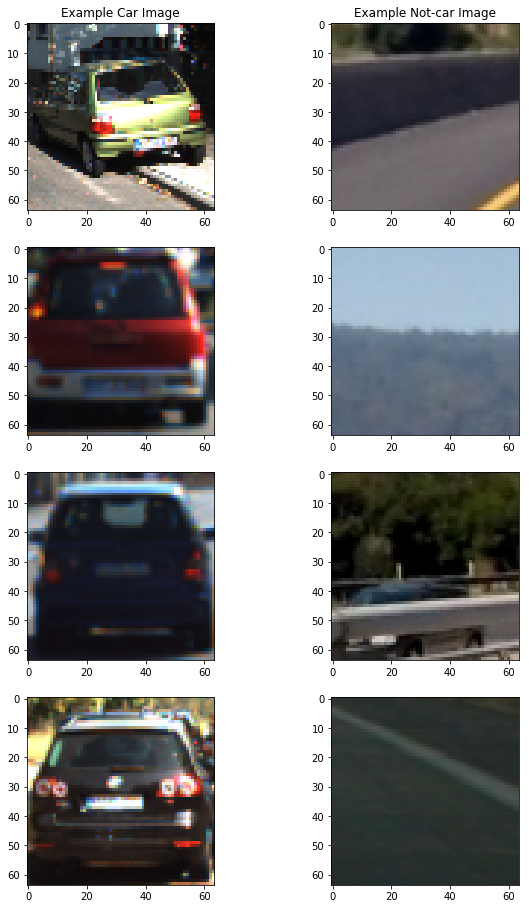

In [18]:
list_cars = []
list_non_cars = []
for i in range(8):
    # Just for fun choose random car / not-car indices and plot example images   
    car_ind = np.random.randint(0, len(cars['train']))
    notcar_ind = np.random.randint(0, len(notcars['train']))

    # Read in car / not-car images
    car_image = mpimg.imread(cars['train'][car_ind])
    notcar_image = mpimg.imread(notcars['train'][notcar_ind])
    
    list_cars.append(car_image)
    list_non_cars.append(notcar_image)

# Plot the examples
fig = plt.figure(figsize=(10,20))
plt.subplot(521)
plt.imshow(list_cars[0])
plt.title('Example Car Image')
plt.subplot(522)
plt.imshow(list_non_cars[0])
plt.title('Example Not-car Image')
plt.subplot(523)
plt.imshow(list_cars[1])
plt.subplot(524)
plt.imshow(list_non_cars[1])
plt.subplot(525)
plt.imshow(list_cars[2])
plt.subplot(526)
plt.imshow(list_non_cars[2])
plt.subplot(527)
plt.imshow(list_cars[3])
plt.subplot(528)
plt.imshow(list_non_cars[3])

In [5]:
pickle.dump([cars, notcars], open( "data_path.p", "wb"))